<h2>Using a greedy algorithmn + 2-opt to solve the travelling salesman problem</h2>

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [2]:
info = pd.read_csv("ulysses16.csv", index_col=0, header=1)

labels = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P"]

cities = []
for x in range(16):
    cities.append(x+1)
    
dist = pd.DataFrame(None, index=cities,columns=cities)

def distance(a,b):
    return math.sqrt((info["x"][a]-info["x"][b])**2+(info["y"][a]-info["y"][b])**2)

for i in range(1,17):
    for j in range(1,17):
        dist[i][j] = distance(i,j)

data = dist

for x in range(1,17):
    data = data.rename(index ={x: str(labels[x-1])}, columns={x: str(labels[x-1])})
    
data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
A,0.0,5.882329,5.421476,3.348194,10.966859,8.258045,7.312216,0.720278,11.708224,7.931066,25.720857,5.294998,5.070799,5.300509,6.691226,1.412091
B,5.882329,0.0,1.291898,4.487427,16.7559,14.10396,13.090611,6.066844,17.130619,13.197348,31.5536,11.074764,10.892952,11.171571,12.513804,6.593345
C,5.421476,1.291898,0.0,4.830114,16.388252,13.468367,12.396116,5.749435,16.233832,12.285154,30.856949,10.402125,10.257144,10.598349,12.11218,5.883672
D,3.348194,4.487427,4.830114,0.0,12.883509,11.007039,10.240396,2.961419,14.874855,11.203258,28.330572,8.290006,7.996562,8.04767,8.833623,4.720551
E,10.966859,16.7559,16.388252,12.883509,0.0,4.401011,5.568528,10.692596,7.882645,8.089264,15.963161,6.779985,6.704103,6.138224,4.28118,10.767302
F,8.258045,14.10396,13.468367,11.007039,4.401011,0.0,1.259365,8.250097,4.797604,3.711024,17.462829,3.077613,3.214607,2.980419,2.970152,7.586626
G,7.312216,13.090611,12.396116,10.240396,5.568528,1.259365,0.0,7.385046,4.89655,2.750654,18.468839,2.020619,2.256214,2.252044,3.170016,6.518136
H,0.720278,6.066844,5.749435,2.961419,10.692596,8.250097,7.385046,0.0,11.931458,8.242245,25.690389,5.394312,5.12884,5.270009,6.447891,2.039608
I,11.708224,17.130619,16.233832,14.874855,7.882645,4.797604,4.89655,11.931458,0.0,3.950456,15.208504,6.631629,6.967704,7.11922,7.758608,10.625841
J,7.931066,13.197348,12.285154,11.203258,8.089264,3.711024,2.750654,8.242245,3.950456,0.0,18.956152,3.408284,3.796103,4.229657,5.820249,6.756937


In [3]:
#cities = ["A","B","C","D"]
#nums = [[0,20,42,35],[20,0,30,34],[42,30,0,12],[35,34,12,0]]
#data = pd.DataFrame(nums, index=cities,columns=cities)
#data

<h3>Random search</h3>

In [4]:
import random

In [5]:
def random_tour(tour):
    tour_list = list(tour)
    random.shuffle(tour_list)
    tour_list.append(tour_list[0])
    return tour_list

def getCostOfRoute(route):
    total = 0
    
    for x in range(len(route)-1):
        a = route[x]
        b = route[x+1]
        total = total+ data[a][b]
    
    return total

In [6]:
import time

In [10]:
def random_search(tour, seconds = 5):
    
    best_tour = ["",10000]
    changes = [[],[]]
    every = [[],[]]
    t_start = time.time()
    t_end = t_start+seconds
    
    #while the time limit isnt hit, a random tour is generated and recorded with its cost
    while time.time() <= t_end:
        rand_tour = random_tour(tour)
        cost = getCostOfRoute(rand_tour)
        every[0].append(cost)
        every[1].append(time.time()-t_start)
        #if the cost found is the lowest, then it is recorded.
        if cost<best_tour[1]:
            changes[0].append(cost)
            changes[1].append(time.time()-t_start)
            best_tour[0] = rand_tour
            best_tour[1] = cost
    return [best_tour, changes, every]

In [11]:
best_tour, changes, every = random_search("ABCDEFGHIJKLMNOP", seconds=10)

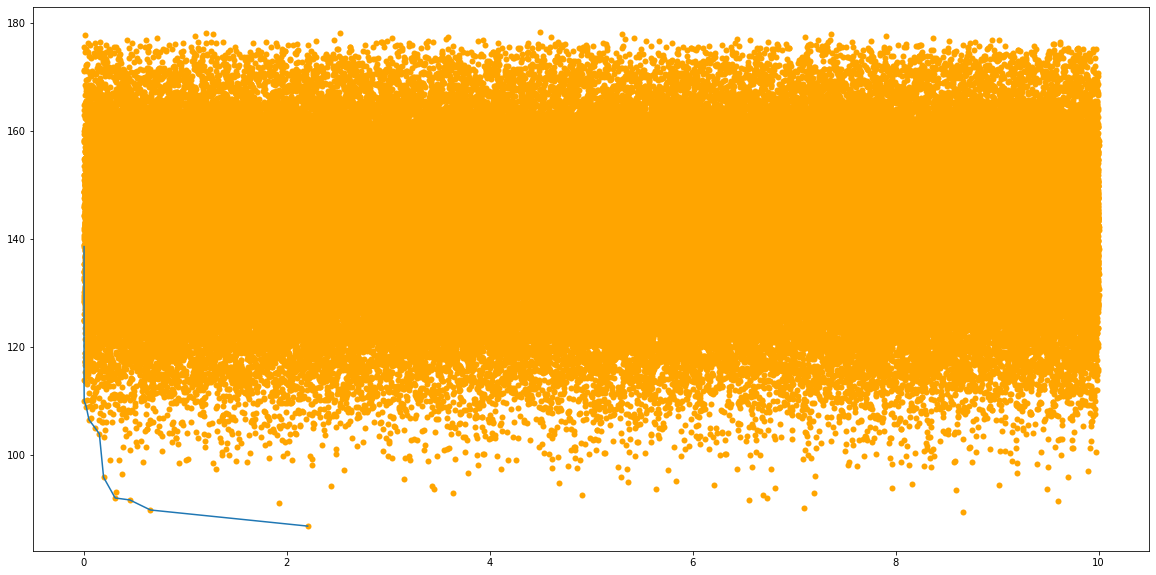

In [12]:
fig = plt.figure(figsize=[20,10])
plt.scatter(every[1],every[0], facecolor="orange", marker='o', linewidths=0.01)
plt.plot(changes[1],changes[0])

In [13]:
def produce_map(arr,score, title):
    new_info = info
    for x in range(1,17):
        new_info = new_info.rename(index ={x: str(labels[x-1])})

    new_info = new_info.reindex(arr)

    fig = plt.figure(figsize=[5,10])
    plt.title(title+". Distance "+str(round(score,2))+".")
    plt.xlim([33, 42])
    plt.plot(new_info["x"],new_info["y"])
    plt.scatter(info["x"],info["y"], facecolor="orange", marker='o', linewidths=0.01)
    for x in range(16):
        plt.annotate(labels[x], (info["x"].iloc[x], info["y"].iloc[x]))   

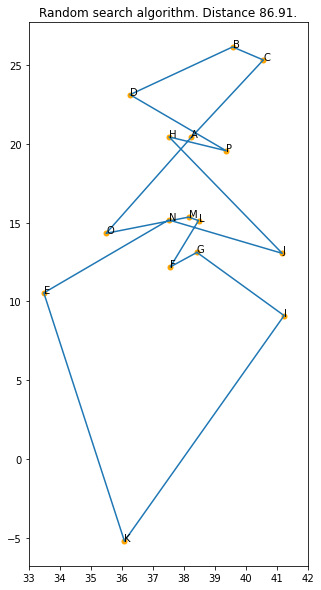

In [14]:
produce_map(best_tour[0],best_tour[1],"Random search algorithm")

<h3>Greedy Algorithm</h3>

In [15]:
def greedy(tour):
    
    #Get all the cities
    cities = []
    for x in data[tour].index:
        cities.append(x)
    
    order = [[tour],[0]]
    current = tour
    cities.remove(current)
    
    for i in range(len(cities)):
        #Find values of all possible routes
        values = [[],[]]
        for x in cities:
            values[0].append(x)
            values[1].append(data[current][x])
        #Find the best route with lowest value
        best_value = min(values[1])
        best_route = values[0][values[1].index(best_value)]
        #Save that route
        order[0].append(best_route)
        order[1].append(best_value)
        
        #Remove the best route from possible cities and make it the current city
        cities.remove(best_route)
        current = best_route
    
    #Return to orignial city to complete tour
    order[0].append(tour)
    order[1].append(data[current][tour])
    
    
    return order

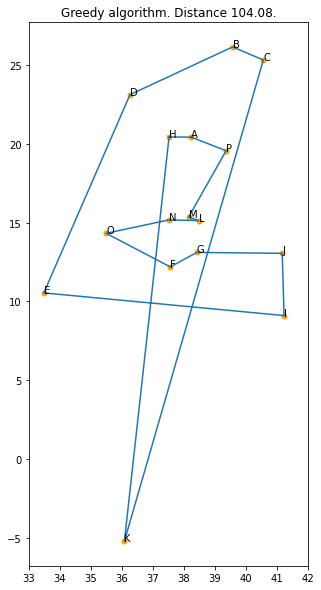

In [16]:
result = greedy("H")
produce_map(result[0],sum(result[1]),"Greedy algorithm")

In [17]:
#Finds the optimal swap of two routes
def two_opt(arr):
    #Create inital best_swap so first result can replace it
    best_swap = ["",1000]
    #Swap each route with every other route
    for i in range(len(arr)):
        for j in range(len(arr)):   
            route = arr.copy()
            a = route[i]
            b = route[j]
            
            route[i] = b
            route[j] = a
            #Add the first city to the end to complete the tour
            route.append(route[0])
            #Find thisswaps cost
            cost = getCostOfRoute(route)
            #If this cost is lower then the current best then save it
            if cost < best_swap[1]:
                best_swap[0] = route
                best_swap[1] = cost
                
    return best_swap

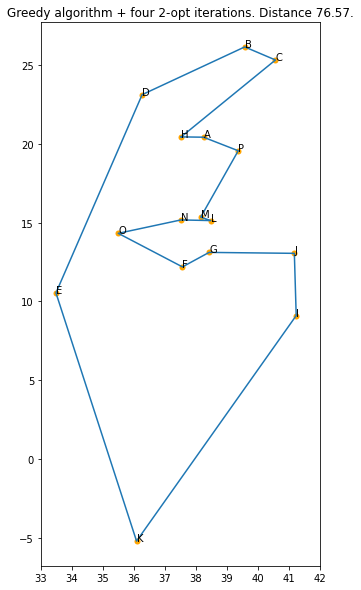

In [18]:
for x in range(4):
    result = two_opt(result[0])
produce_map(result[0],result[1],"Greedy algorithm + four 2-opt iterations")

In [19]:
result[0]

['H',
 'A',
 'P',
 'M',
 'L',
 'N',
 'O',
 'F',
 'G',
 'J',
 'I',
 'K',
 'E',
 'D',
 'B',
 'C',
 'H',
 'H',
 'H',
 'H',
 'H']